# CLASSIFICATION AND REGRESSION TREE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

In [10]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [54]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=2500).fit(X_train, y_train)

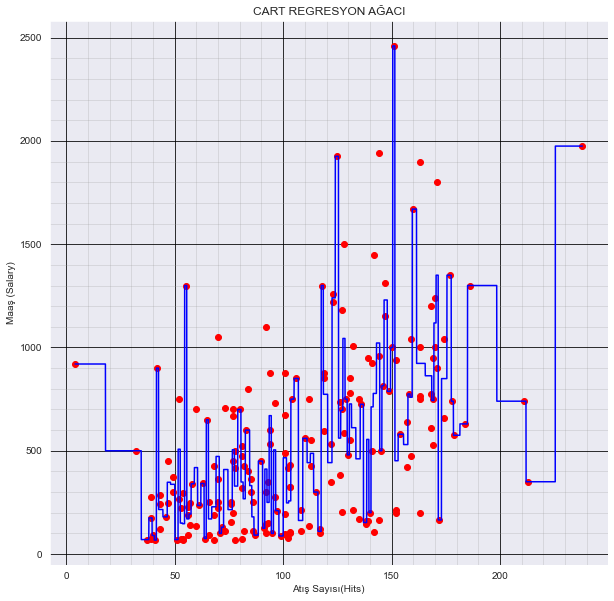

In [55]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), .01)
X_grid = X_grid.reshape((len(X_grid), 1))

sns.set_style("dark")
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")
plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3);

In [59]:
# TEK DEĞİŞKEN İÇİN
y_pred = cart_model.predict(X_test)

In [60]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

468.49579052913884

In [116]:
# TÜM DEĞİŞKENLER İÇİN
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

In [117]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [118]:
y_pred = cart_model.predict(X_test)

In [119]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

463.40121057281294

In [120]:
r2_score(y_test, y_pred)

0.008015502482093484

### MODEL TUNING

In [4]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [5]:
y_pred = cart_model.predict(X_test)

In [6]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

434.17245930420046

In [7]:
cart_model?

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\ertug\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "bes

In [33]:
cart_params = {"max_depth":[i for i in np.arange(1, 100)],
               "min_samples_split":[i for i in np.arange(2, 100)]}

In [34]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=100, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 100 folds for each of 9702 candidates, totalling 970200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.2s


KeyboardInterrupt: 

In [17]:
cart_cv_model.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [29]:
cart_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=50).fit(X_train, y_train)

In [30]:
y_pred = cart_tuned.predict(X_test)

In [31]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

361.0876906511434

In [32]:
r2_score(y_test, y_pred)

0.3976957541731726